In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [2]:
def dot(state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)

In [3]:
n_q = 2
N1 = 15
N2 = 15
n_c1 = N1
n_c2 = N2

In [4]:
def plot_populations(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 3 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i)+',' + str(j)+'>')
            
    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

In [5]:
test = qload('State_store_g01g02_g20g10_only_g10.txt')
#test = qload('State_store_g01g02_g20g10_superpos.txt')

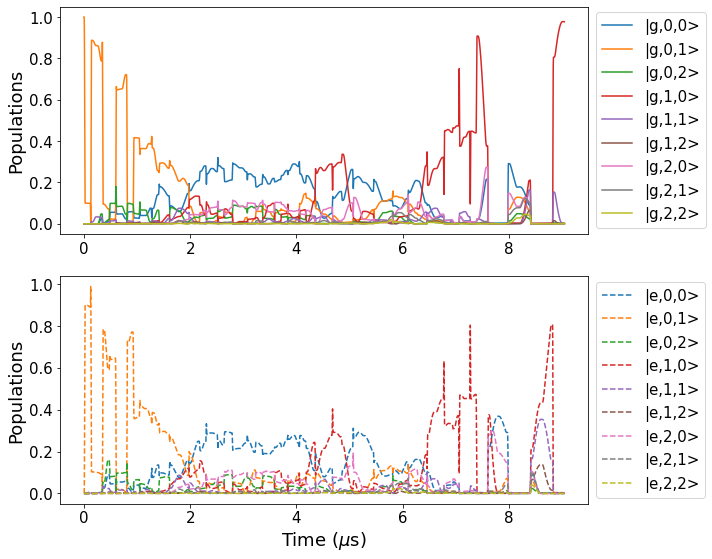

In [6]:
plot_populations(test, 'test.pdf', r'$\frac{1}{\sqrt{2}}(g01 + g02) \rightarrow \frac{1}{\sqrt{2}}(g10 + g20)$ (15 layers, 15 levels)')

In [19]:
def plot_populations2(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(1,1, figsize=(10,4))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 2 # to be shown on the plot
    colors = ['red', 'orange', 'green', 'pink']
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs.plot(times, pops, color  = colors[i*max_num_levels + j], label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs.plot(times, pops, color  = colors[i*max_num_levels + j],linestyle = '--',  label = '|e,'+str(i)+',' + str(j)+'>')
            
    axs.set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs.set_ylabel("Populations", fontsize = 18)
    #axs[0].set_ylabel("Populations", fontsize = 18)
   # axs.tick_params(axis = 'both', which = 'major', labelsize = '15')
#     axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
#     axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

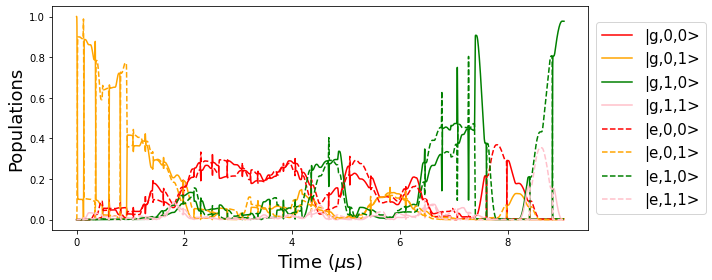

In [20]:
plot_populations2(test, 'test.pdf', r'$\frac{1}{\sqrt{2}}(g01 + g02) \rightarrow \frac{1}{\sqrt{2}}(g10 + g20)$ (15 layers, 15 levels)')